Zora Barnett & Carrington Body

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#import data 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# /content/drive/MyDrive/ML_FINAL/
data = pd.read_csv('DatafinitiElectronicsProductsPricingData.csv') 
data.head()
data.tail()

,id,prices.amountMax,prices.amountMin,prices.availability,prices.condition,prices.currency,prices.dateSeen,prices.isSale,prices.merchant,prices.shipping,...,name,primaryCategories,sourceURLs,upc,weight,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
14587,AVpgibRDLJeJML43PTZX,65.99,65.99,NaN,NaN,USD,2015-09-05T00:00:00Z,True,NaN,USD 13.81 shipping,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40005E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14588,AVpgibRDLJeJML43PTZX,58.99,58.99,Yes,New,USD,"2017-10-10T19:00:00Z,2017-09-06T17:00:00Z,2017...",False,Bestbuy.com,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40005E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14589,AVpgibRDLJeJML43PTZX,58.49,58.49,In Stock,New,USD,2018-03-05T11:00:00Z,False,Walmart.com,Standard,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40005E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14590,AVpgibRDLJeJML43PTZX,77.98,77.98,NaN,NaN,USD,2016-03-22T00:00:00Z,True,NaN,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40005E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN
14591,AVpgibRDLJeJML43PTZX,71.95,71.95,NaN,new,USD,2015-12-05T00:00:00Z,False,Beach Audio Inc - Walmart.com,NaN,...,naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Electronics,https://www.walmart.com/reviews/product/441840...,8.40005E+11,4.1 pounds,NaN,NaN,NaN,NaN,NaN


How can we switch some of the quanitative data to qualative

KNN CLUSTERING METHOD #1

In [4]:
X = data.iloc[:,[1,2,]].valuesX = data.iloc[:,[1,2,]].values
print(X)

[[104.99 104.99]
 [ 69.    64.99]
 [ 69.    69.  ]
 ...
 [ 58.49  58.49]
 [ 77.98  77.98]
 [ 71.95  71.95]]


C:\Users\avitr\AppData\Local\Temp\ipykernel_10704\2511202697.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X = data.iloc[:,[1,2,]].valuesX = data.iloc[:,[1,2,]].values


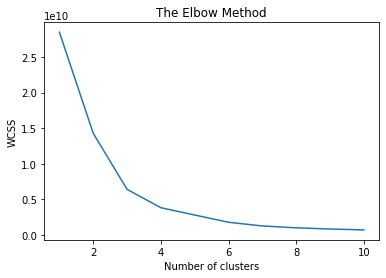

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state= 42 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X)

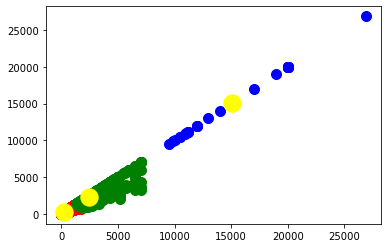

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')



How can we improve this?

KNN CLUSTERING #2


In [12]:
#split data into groups
data.loc[data['prices.condition'] == 'New','prices.condition'] = 0
data.loc[data['prices.condition'] == 'Used','prices.condition'] = 1
data.loc[data['prices.condition'] == 'Refurbished','prices.condition'] = 2
#data.head()
new_data = data[data['prices.condition'] == 0][['prices.amountMax','prices.amountMin']]
used_data = data[data['prices.condition']==1][['prices.amountMax','prices.amountMin']]
refub_data = data[data['prices.condition']==2][['prices.amountMax','prices.amountMin']]

In [14]:
new_data.head()

,prices.amountMax,prices.amountMin
0,104.99,104.99
1,69.00,64.99
2,69.00,69.00
3,69.99,69.99
4,66.99,66.99


In [15]:
used_data.head()

,prices.amountMax,prices.amountMin
127,139.99,139.99
155,39.99,39.99
311,419.95,419.95
407,150.00,150.00
623,279.95,279.95


In [17]:
refub_data.head()

,prices.amountMax,prices.amountMin
198,299.99,299.99
199,649.99,649.99
200,249.99,249.99
737,219.99,219.99
1002,549.99,549.99


In [9]:
# 3 differnt feature data for the categories

new_X = new_data.iloc[:,[1,2,]].values 
#used_X = used_data[used_data]
refub_X = refub_data.iloc[:, [3, 4]].values

print(new_data)

                         id  prices.amountMax  prices.amountMin  \
0      AVphzgbJLJeJML43fA0o            104.99            104.99   
1      AVpgMuGwLJeJML43KY_c             69.00             64.99   
2      AVpgMuGwLJeJML43KY_c             69.00             69.00   
3      AVpgMuGwLJeJML43KY_c             69.99             69.99   
4      AVpgMuGwLJeJML43KY_c             66.99             66.99   
...                     ...               ...               ...   
14583  AVpgibRDLJeJML43PTZX             81.52             81.52   
14584  AVpgibRDLJeJML43PTZX             85.99             85.99   
14586  AVpgibRDLJeJML43PTZX             58.99             58.99   
14588  AVpgibRDLJeJML43PTZX             58.99             58.99   
14589  AVpgibRDLJeJML43PTZX             58.49             58.49   

      prices.availability prices.condition prices.currency  \
0                     Yes                0             USD   
1                In Stock                0             USD   
2        

In [ ]:
# new data elbow


ValueError: ignored

Hierarachical Cluster Method


In [ ]:
#split data into groups
data.loc[data['prices.condition'] == 'New','prices.condition'] = 0
data.loc[data['prices.condition'] == 'Used','prices.condition'] = 1
data.loc[data['prices.condition'] == 'Refurbished','prices.condition'] = 2
#data.head()
new_data = data[data['prices.condition'] == 0]
used_data = data[data['prices.condition']==1]
refub_data = data[data['prices.condition']==2]

print('new data',new_data)
print('used_data',used_data)
print('refub_data',refub_data)

#products = data.groupby('prices.condition')['prices.condition']
#print(products)

new data                          id  prices.amountMax  prices.amountMin  \
0      AVphzgbJLJeJML43fA0o            104.99            104.99   
1      AVpgMuGwLJeJML43KY_c             69.00             64.99   
2      AVpgMuGwLJeJML43KY_c             69.00             69.00   
3      AVpgMuGwLJeJML43KY_c             69.99             69.99   
4      AVpgMuGwLJeJML43KY_c             66.99             66.99   
...                     ...               ...               ...   
14583  AVpgibRDLJeJML43PTZX             81.52             81.52   
14584  AVpgibRDLJeJML43PTZX             85.99             85.99   
14586  AVpgibRDLJeJML43PTZX             58.99             58.99   
14588  AVpgibRDLJeJML43PTZX             58.99             58.99   
14589  AVpgibRDLJeJML43PTZX             58.49             58.49   

      prices.availability prices.condition prices.currency  \
0                     Yes                0             USD   
1                In Stock                0             USD   


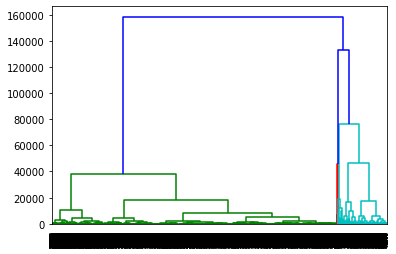

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc


array([1, 1, 1, ..., 1, 1, 1])